# Dota 2 Stats Visualization

Using the data we collected in the collect.ipynb file, we will be retrieving the data from the resulting csv to get the following results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

matches_df = pd.read_csv("matches.csv")
rc_matches_df = pd.read_csv("recent_matches.csv")

Top 25 Heroes Stats Dataframe Creation

In [2]:
heros_played = matches_df['hero_name'].unique()
hero_stats = pd.DataFrame()

for hero in heros_played:
    selected_hero_stats = pd.DataFrame()

    selected_hero = matches_df[matches_df.hero_name == hero]

    selected_hero_stats['hero_name'] = [hero]
    selected_hero_stats['total_games'] = [selected_hero.shape[0]]
    selected_hero_stats['wins'] = [selected_hero[selected_hero.player_win == True].shape[0]]
    selected_hero_stats['losses'] = [selected_hero[selected_hero.player_win == False].shape[0]]
    
    selected_hero_stats['average_kills'] = [round(selected_hero.kills.mean(), 2)]
    selected_hero_stats['average_deaths'] = [round(selected_hero.deaths.mean(), 2)]
    selected_hero_stats['average_assists'] = [round(selected_hero.assists.mean(), 2)]

    selected_hero_stats['hero_name_winloss'] = [hero + '  [ WR:' + str(round(selected_hero_stats['wins'][0] / selected_hero_stats['total_games'][0] * 100)) + '% ]']

    hero_stats = hero_stats.append(selected_hero_stats, ignore_index=True)

hero_stats[:5]

,hero_name,total_games,wins,losses,average_kills,average_deaths,average_assists,hero_name_winloss
0,Snapfire,5,2,3,5.40,3.80,10.60,Snapfire [ WR:40% ]
1,Mars,10,5,5,7.30,5.60,9.40,Mars [ WR:50% ]
2,Chaos Knight,18,10,8,6.22,5.94,9.28,Chaos Knight [ WR:56% ]
3,Shadow Shaman,31,19,12,3.77,9.55,13.06,Shadow Shaman [ WR:61% ]
4,Ogre Magi,35,18,17,6.14,7.69,16.60,Ogre Magi [ WR:51% ]


In [3]:
most_played = hero_stats.sort_values('total_games', ascending=False)[:25]
most_played

,hero_name,total_games,wins,losses,average_kills,average_deaths,average_assists,hero_name_winloss
5,Outworld Devourer,144,85,59,12.47,6.26,10.91,Outworld Devourer [ WR:59% ]
9,Bristleback,54,44,10,8.33,6.20,16.57,Bristleback [ WR:81% ]
38,Techies,47,24,23,8.94,8.11,6.94,Techies [ WR:51% ]
22,Nature's Prophet,43,20,23,5.02,8.42,11.05,Nature's Prophet [ WR:47% ]
20,Medusa,43,25,18,7.44,4.02,13.30,Medusa [ WR:58% ]
61,Omniknight,43,28,15,2.88,6.19,12.30,Omniknight [ WR:65% ]
47,Enigma,41,23,18,3.95,6.76,15.46,Enigma [ WR:56% ]
56,Templar Assassin,40,17,23,8.52,5.35,9.02,Templar Assassin [ WR:42% ]
16,Phantom Assassin,36,19,17,9.97,6.72,10.42,Phantom Assassin [ WR:53% ]
57,Pudge,35,16,19,7.06,8.94,9.20,Pudge [ WR:46% ]


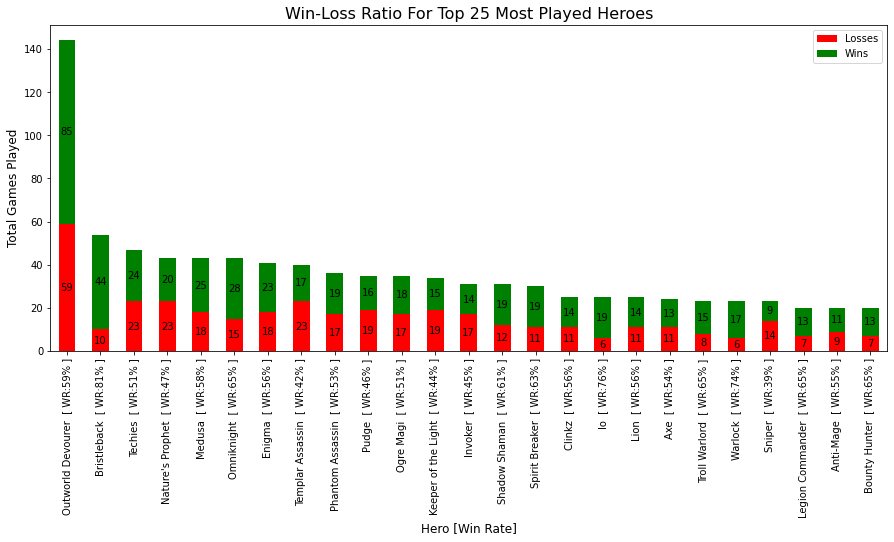

In [4]:
most_played = hero_stats.sort_values('total_games', ascending=False)[:25]
winloss_top25 = most_played[['hero_name_winloss', 'losses', 'wins']]

ax = winloss_top25.plot(kind='bar', stacked=True, color=['r','g'], x='hero_name_winloss', figsize=(15,6))

for container in ax.containers:

  labels = []
  for value in container:
    rounded_val = round(value.get_height(), 0)

    if(rounded_val > 0):
      labels.append(int(rounded_val)) 
    else:
      labels.append('')

  ax.bar_label(container, labels=labels, label_type='center')

plt.title('Win-Loss Ratio For Top 25 Most Played Heroes', fontsize=16)
plt.xlabel('Hero [Win Rate]', fontsize=12)
plt.ylabel('Total Games Played', fontsize=12)
plt.legend(['Losses', 'Wins'])


Text(0, 0.5, 'Party Size')

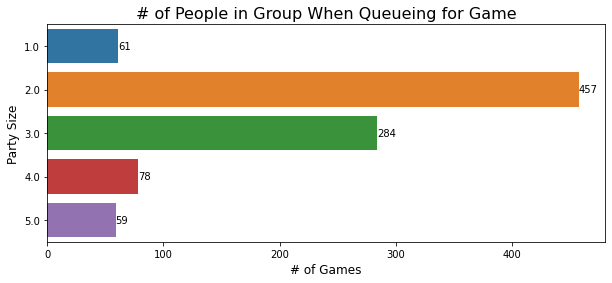

In [5]:
plt.figure(figsize = (10,4))
ax = sns.countplot(data=matches_df[matches_df.party_size.between(1,5)], y='party_size')
ax = ax.bar_label(ax.containers[0])

plt.title('# of People in Group When Queueing for Game', fontsize=16)
plt.xlabel('# of Games', fontsize=12)
plt.ylabel('Party Size', fontsize=12)

Text(0, 0.5, '')

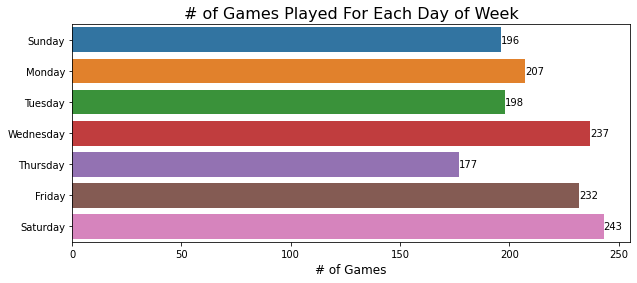

In [6]:
days_order = {'Sunday' : 0, 'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6}
matches_df['day_id'] = matches_df['day_of_week'].map(days_order)
plt.figure(figsize = (10,4))
ax = sns.countplot(data=matches_df.sort_values('day_id'), y='day_of_week')
ax = ax.bar_label(ax.containers[0])

plt.title('# of Games Played For Each Day of Week', fontsize=16)
plt.xlabel('# of Games', fontsize=12)
plt.ylabel('')

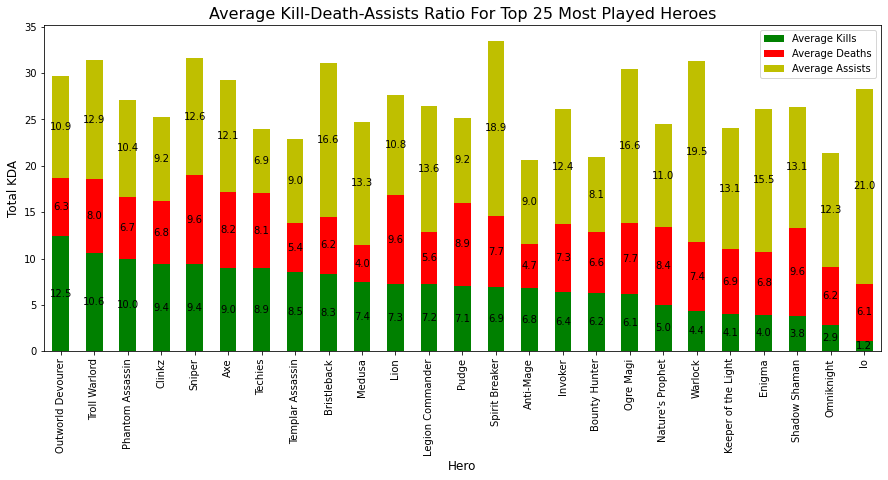

In [7]:
most_played = hero_stats.sort_values('total_games', ascending=False)[:25]
kda_top25 = most_played[['hero_name','average_kills','average_deaths', 'average_assists']]
kda_top25 = kda_top25.sort_values('average_kills', ascending=False)[:25]

ax = kda_top25.plot(kind='bar', stacked=True, color=['g','r','y'], x='hero_name', figsize=(15,6))

for container in ax.containers:

  labels = []
  for value in container:
    rounded_val = round(value.get_height(), 1)

    if(rounded_val > 0):
      labels.append(rounded_val) 
    else:
      labels.append('')

  ax.bar_label(container, labels=labels, label_type='center')

plt.title('Average Kill-Death-Assists Ratio For Top 25 Most Played Heroes', fontsize=16)
plt.xlabel('Hero', fontsize=12)
plt.ylabel('Total KDA', fontsize=12)
plt.legend(['Average Kills', 'Average Deaths', 'Average Assists'])

In [8]:
rc_matches_df.columns

Index(['Unnamed: 0', 'match_id', 'player_slot', 'radiant_win', 'duration',
       'game_mode', 'lobby_type', 'hero_id', 'start_time', 'version', 'kills',
       'deaths', 'assists', 'skill', 'xp_per_min', 'gold_per_min',
       'hero_damage', 'tower_damage', 'hero_healing', 'last_hits', 'lane',
       'lane_role', 'is_roaming', 'cluster', 'leaver_status', 'party_size',
       'hero_name', 'player_side', 'player_win'],
      dtype='object')

In [9]:
win_rc_matches = rc_matches_df[rc_matches_df.player_win == True]
loss_rc_matches = rc_matches_df[rc_matches_df.player_win == False]

gpm_win_rc_matches = pd.DataFrame(win_rc_matches.groupby(['hero_name'])['gold_per_min'].mean()).reset_index()
gpm_loss_rc_matches = pd.DataFrame(loss_rc_matches.groupby(['hero_name'])['gold_per_min'].mean()).reset_index()
gpm_win_rc_matches.sort_values(by='gold_per_min',ascending=False)

fig = go.Figure(data=[
    go.Bar(x=gpm_win_rc_matches.hero_name, y=gpm_win_rc_matches.gold_per_min, name='Winning Games'),
    go.Bar(x=gpm_loss_rc_matches.hero_name, y=gpm_loss_rc_matches.gold_per_min, name='Losing Games')
])
fig.update_layout(
    title = 'Gold Per Minute in Last 20 Games Per Hero, Win vs Loss'
)
fig.show()

In [10]:
# df_Paid.groupby(['Charge Code'])['Days'].mean()
lh_win_rc_matches = pd.DataFrame(win_rc_matches.groupby(['hero_name'])['last_hits'].mean()).reset_index()
lh_loss_rc_matches = pd.DataFrame(loss_rc_matches.groupby(['hero_name'])['last_hits'].mean()).reset_index()

fig = go.Figure(data=[
    go.Bar(x=win_rc_matches.hero_name, y=win_rc_matches.last_hits, name='Winning Games'),
    go.Bar(x=loss_rc_matches.hero_name, y=loss_rc_matches.last_hits, name='Losing Games')
])
fig.update_layout(
    title = 'Last Hits in Last 20 Games Per Hero, Win vs Loss '
)
fig.show()

In [57]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)



app.layout = html.Div([
    html.H3(children='Heroes'),
    dcc.Dropdown(
        id='heroes',
        options=[{'label': x, 'value': x} for x in rc_matches_df['hero_name'].unique()],
        value=rc_matches_df['hero_name'].unique(),
        multi=True
    ),
    html.H3(children='Data Type'),
    dcc.RadioItems(
        id='type-data',
        options=[
            {'label': 'Gold Per Minute', 'value': 'gold_per_min'}, 
            {'label': 'Experience Per Minute','value': 'xp_per_min'},
            {'label': 'Last Hits', 'value': 'last_hits'}],
        value='gold_per_min'
    ),
    html.H3(children='Game Outcome'),
    dcc.RadioItems(
        id='game-outcome',
        options=[
            {'label': 'Win', 'value': 'win'}, 
            {'label': 'Loss','value': 'loss'},
            {'label': 'Both', 'value': 'both'}],
        value='both'
    ),
    dcc.Graph(id='graph-with-slider'),
    dcc.Graph(id='graph2-with-slider'),
    dcc.Graph(id='graph3-with-slider')
])


@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('heroes', 'value')],
    [Input('type-data', 'value')],
    [Input('game-outcome', 'value')]
)
def update_figure(heroes, type_data, game_outcome):

    heros_selected = rc_matches_df.loc[rc_matches_df['hero_name'].isin(heroes)].copy()
    win_rc_matches = heros_selected[heros_selected.player_win == True]
    loss_rc_matches = heros_selected[heros_selected.player_win == False]

    if(game_outcome== 'loss'):
        loss_rc_matches = pd.DataFrame(loss_rc_matches.groupby(['hero_name'])[type_data].mean()).reset_index()
        loss_rc_matches = loss_rc_matches.sort_values(by=type_data,ascending=False)
        fig = px.bar(x=loss_rc_matches.hero_name, y=loss_rc_matches[type_data])
    elif(game_outcome== 'win'):
        win_rc_matches = pd.DataFrame(win_rc_matches.groupby(['hero_name'])[type_data].mean()).reset_index()
        win_rc_matches = win_rc_matches.sort_values(by=type_data,ascending=False)
        fig = px.bar(x=win_rc_matches.hero_name, y=win_rc_matches[type_data])
    else:
        heros_selected = pd.DataFrame(heros_selected.groupby(['hero_name'])[type_data].mean()).reset_index()
        heros_selected = heros_selected.sort_values(by=type_data,ascending=False)
        fig = px.bar(x=heros_selected.hero_name, y=heros_selected[type_data])

    return fig


if __name__ == '__main__':
    app.run_server(mode="inline")